# Obtaining Data for Single Cells 

This section will serve as an introduction to the Allen Cell Types database. We'll work with the AllenSDK to see what information we can gain about our cells.

First, let's make sure you have an updated version of the Allen Institute Database installed. If you do not have the version below, this cell will install it for you. There is more information on installing the AllenSDK in the <a href="http://alleninstitute.github.io/AllenSDK/install.html">install guide</a>. 

In [22]:
# This will ensure that the AllenSDK is installed.
# If not, it will install it for you.
try:
    import allensdk
    if allensdk.__version__ == '2.11.2':
        print('allensdk already installed.')
    else: 
        print('incompatible version of allensdk installed')
        !pip install allensdk==2.11.2
except ImportError as e:
    !pip install allensdk==2.11.2

allensdk already installed.


Next, we'll `import` the CellTypesCache module. This module provides tools to allow us to access information from the Allen Cell Types database. We're passing it a **manifest** filename as well. CellTypesCache will store the data in the path specified by the manifest filename. You can look under cell_types in your directory, and take a look at the file.

If you're curious, you can see the full source documentation for the core package on the <a href="https://allensdk.readthedocs.io/en/latest/allensdk.core.html">Allen Brain Atlas website</a>

In [23]:
# Import the "Cell Types Cache" from the AllenSDK core package
from allensdk.core.cell_types_cache import CellTypesCache

# Import CellTypesApi, which will allow us to query the database.
from allensdk.api.queries.cell_types_api import CellTypesApi

# Import packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

# We'll then initialize the cache as 'ctc' (cell types cache)
ctc = CellTypesCache(manifest_file='cell_types/manifest.json')

print('Packages were successfully imported.')

Packages were successfully imported.


## Get Available Cells

The `get_cells()` method downloads metadata for cells in the database. The database contains human cells and mouse cells. By default, `get_cells()` downloads metadata for *all* cells in the database. Alternatively, you can filter the database to only include cells collected from a certain species.
Look through <a href="https://allensdk.readthedocs.io/en/latest/allensdk.core.cell_types_cache.html">the documentation for the CellTypesCache</a> for more information on the `get_cells` method.

In [24]:
# Download metadata for all cells in the database
all_cells = ctc.get_cells()

# Convert it to a dataframe with the cell id as the index
all_cells_df = pd.DataFrame(all_cells).set_index('id')

print('Number of cells:',len(all_cells_df))
all_cells_df.head()

Number of cells: 2333


,reporter_status,cell_soma_location,species,name,structure_layer_name,structure_area_id,structure_area_abbrev,transgenic_line,dendrite_type,apical,reconstruction_type,disease_state,donor_id,structure_hemisphere,normalized_depth
id,,,,,,,,,,,,,,,
525011903,None,"[273.0, 354.0, 216.0]",Homo Sapiens,H16.03.003.01.14.02,3,12113,FroL,,spiny,intact,None,epilepsy,524848408,right,NaN
565871768,positive,"[8966.56330957526, 1429.52689052075, 8567.3896...",Mus musculus,Oxtr-2A-Cre;Ai14-293837.03.01.02,5,385,VISp,Oxtr-T2A-Cre,aspiny,NA,None,,563340157,left,0.582057
469801138,positive,"[7872.53138541818, 993.212032389272, 3127.1530...",Mus musculus,Pvalb-IRES-Cre;Ai14-170927.05.02.01,4,385,VISp,Pvalb-IRES-Cre,aspiny,NA,None,,319194354,right,0.469578
528642047,None,"[69.0, 254.0, 96.0]",Homo Sapiens,H16.06.009.01.02.06.05,5,12141,MTG,,aspiny,NA,None,epilepsy,528574320,left,NaN
605889373,positive,"[9400.0, 1520.74232706376, 2188.13845194139]",Mus musculus,Vipr2-IRES2-Cre;Slc32a1-T2A-FlpO;Ai65-337419.0...,2/3,385,VISp,Slc32a1-T2A-FlpO|Vipr2-IRES2-Cre,aspiny,NA,None,,605622695,right,NaN


The Allen Institute for Brain Science uses transgenic mouse lines that have Cre-expressing cells to mark specific types of cells in the brain. Lets find out what cre-lines are availabe in our mouse data under the column `transgenic_line`. 

We can take a look at how many different values are stored within a column using the `.unique()` method.

In [25]:
all_cells_df['transgenic_line'].unique()

array(['', 'Oxtr-T2A-Cre', 'Pvalb-IRES-Cre',
       'Slc32a1-T2A-FlpO|Vipr2-IRES2-Cre', 'Cux2-CreERT2',
       'Scnn1a-Tg3-Cre', 'Htr3a-Cre_NO152', 'Rorb-IRES2-Cre',
       'Ctgf-T2A-dgCre', 'Nkx2-1-CreERT2', 'Vip-IRES-Cre',
       'Chrna2-Cre_OE25', 'Nos1-CreERT2|Sst-IRES-FlpO', 'Scnn1a-Tg2-Cre',
       'Nos1-CreERT2', 'Ntsr1-Cre_GN220', 'Esr2-IRES2-Cre',
       'Tlx3-Cre_PL56', 'Vipr2-IRES2-Cre',
       'Chrna2-Cre_OE25|Pvalb-T2A-Dre', 'Nr5a1-Cre', 'Ndnf-IRES2-dgCre',
       'Sst-IRES-Cre', 'Gad2-IRES-Cre', 'Chat-IRES-Cre-neo',
       'Slc17a6-IRES-Cre', 'Sim1-Cre_KJ18', 'Glt25d2-Cre_NF107',
       'Rbp4-Cre_KL100', 'Penk-IRES2-Cre-neo',
       'Htr3a-Cre_NO152|Pvalb-T2A-Dre', 'Esr2-IRES2-Cre|PhiC31-neo',
       'Gng7-Cre_KH71', 'Pvalb-T2A-FlpO|Vipr2-IRES2-Cre',
       'Pvalb-T2A-CreERT2', 'Esr2-IRES2-Cre-neo|PhiC31-neo',
       'Esr2-IRES2-Cre-neo', 'Vipr2-IRES2-Cre-neo'], dtype=object)

For more information on the Allen Cell Types Cre lines, please visit <a href="https://docs.google.com/document/d/1ZMMZgc7cS5BHhoWNqzjw95BdxOuj5wrYl9I7PV2HeUI/edit">the Allen Cell Types Cre Lines Glossary</a> for a short description of the cortical expression patterns of the transgenic Cre lines available in the Allen Cell Types dataset.

## Get Morphology data

The dataframe above only contains metadeta about our cells and no information on the morphology or electrophysiology of our cells. In order to get information about the morphology of these cells, we need to use the `get_morphology_features()` method on our instance of the cell types cache. We will set the indices to be the `specimen_id` because these ids will align with those in `all_cells_df`.

In [26]:
# Downloads the morphology features and sets up the dataframe all in one line
morphology_df = pd.DataFrame(ctc.get_morphology_features()).set_index('specimen_id')
print('Length of dataframe:',len(morphology_df))
morphology_df.head()

Length of dataframe: 701


,average_bifurcation_angle_local,average_bifurcation_angle_remote,average_contraction,average_diameter,average_fragmentation,average_parent_daughter_ratio,hausdorff_dimension,id,max_branch_order,max_euclidean_distance,...,overall_width,scale_factor_x,scale_factor_y,scale_factor_z,soma_surface,superseded,tags,total_length,total_surface,total_volume
specimen_id,,,,,,,,,,,,,,,,,,,,,
478107198,82.727781,NaN,0.864267,0.345092,20.723077,0.964510,NaN,491119743,6.0,99.779724,...,136.267522,0.1144,0.1144,0.28,435.740270,False,3D Neuron Reconstruction morphology,1666.082926,1803.875644,167.343086
502367941,82.506680,NaN,0.903890,0.634047,105.277778,0.862183,NaN,546781359,3.0,432.383110,...,370.170045,0.1144,0.1144,0.28,1446.587725,False,3D Neuron Reconstruction morphology,2277.259374,4543.139073,921.571895
515771244,77.536678,NaN,0.863104,0.417929,73.666667,0.926633,NaN,537042261,6.0,373.630444,...,381.015114,0.1144,0.1144,0.28,287.118123,False,3D Neuron Reconstruction morphology,3589.339062,4704.910407,582.285423
561435279,76.583222,NaN,0.900537,0.400396,95.979167,0.942049,NaN,689123605,11.0,943.382549,...,524.550156,0.1144,0.1144,0.28,180.994813,False,3D Neuron Reconstruction morphology,5416.228778,6814.933290,740.722806
591268268,72.019250,NaN,0.873518,0.227626,47.535714,1.000000,NaN,657879305,5.0,186.218009,...,261.459057,0.1144,0.1144,0.28,55.055236,False,3D Neuron Reconstruction morphology,1659.465869,1185.773462,69.144146


Now we have two dataframes, one with the metadata for our cells, indexed by id, and another with the morphology data for all cells, also indexed by id. Usefully, these ids are unique to each cell, meaning we can match them across dataframes.

We'll use [join](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html) to unite our dataframes. Since for the moment we're only interested in cells that have morphology data, we'll **join** the dataframes "on the right," effectively dropping all of the cells that are not in the morphology dataframe.

**Note**: Above, in get the `get_cells()` method, you can also restrict to experiments with morphology data by usnig the `require_morphology = True` argument.

In [27]:
# Combine our metadata with our morphology data
meta_morph_df = all_cells_df.join(morphology_df,how='right')
print('Number of cells:',len(meta_morph_df))
meta_morph_df.head()

Number of cells: 701


,reporter_status,cell_soma_location,species,name,structure_layer_name,structure_area_id,structure_area_abbrev,transgenic_line,dendrite_type,apical,...,overall_width,scale_factor_x,scale_factor_y,scale_factor_z,soma_surface,superseded,tags,total_length,total_surface,total_volume
313861608,positive,"[9349.44051500564, 1314.78991021449, 3245.6530...",Mus musculus,Pvalb-IRES-Cre;Ai14-165874.04.02.01,5,385,VISp,Pvalb-IRES-Cre,aspiny,NA,...,358.994232,0.1144,0.1144,0.28,514.500853,False,3D Neuron Reconstruction morphology,3538.876780,6041.095769,945.093080
313862022,positive,"[9489.24257509068, 1423.65239028148, 2785.4430...",Mus musculus,Scnn1a-Tg2-Cre;Ai14-167081.03.02.01,4,385,VISp,Scnn1a-Tg2-Cre,spiny,intact,...,287.122628,0.1144,0.1144,0.28,268.777679,False,3D Neuron Reconstruction morphology,3498.090031,3523.606841,306.290931
313862167,positive,"[9279.53948496313, 1831.03502009105, 2151.2443...",Mus musculus,Sst-IRES-Cre;Ai14-167638.05.02.01,4,409,VISl,Sst-IRES-Cre,aspiny,NA,...,327.150383,0.1144,0.1144,0.28,361.118559,False,3D Neuron Reconstruction morphology,2644.878298,3883.698604,512.836253
313862167,positive,"[9279.53948496313, 1831.03502009105, 2151.2443...",Mus musculus,Sst-IRES-Cre;Ai14-167638.05.02.01,4,409,VISl,Sst-IRES-Cre,aspiny,NA,...,327.150383,0.1144,0.1144,0.28,361.118559,True,3D Neuron Reconstruction morphology,2644.878347,3883.699514,512.835043
313862306,positive,"[8976.63502144556, 1878.14058922573, 8881.4968...",Mus musculus,Sst-IRES-Cre;Ai14-167636.04.01.01,6a,385,VISp,Sst-IRES-Cre,aspiny,NA,...,242.781213,0.1144,0.1144,0.28,94.306278,False,3D Neuron Reconstruction morphology,2502.160541,1994.902243,141.878464


The Cell Types Database also contains 3D reconstructions of neuronal morphologies. You can create these single cell reconstructions by executing the `get_reconstruction()` method on your instance of the cells type cache. To do so, you must specify what cell you want to reconstruct by inputing a `specimen_id`. This method returns a class instance with methods for accessing morphology compartments. 

In [28]:
# Get the cell_id for the first cell in our dataframe
cell_id = meta_morph_df.index[0]

# Call for recontruction of desired cell
single_cell_morphology = ctc.get_reconstruction(specimen_id = cell_id)

# Get summary of cell reconstruction 
single_cell_morphology.soma

{'id': 0,
 'type': 1,
 'x': 396.0425,
 'y': 368.9697,
 'z': 26.6608,
 'radius': 6.4254,
 'parent': -1,
 'tree_id': 0,
 'children': [1, 487, 982, 1101, 1664, 1872, 2379, 3077]}

We now have a dictionary of our cell reconstruction. Note that the type field refers to the type of neuronal compartment. The values can be 1 for the soma, 2 for the axon, 3 for dendrites, and 4 for apical dendrites (if present). The x, y, and z, represent the spatial location of the cell soma.

Morphologies also come with marker files, which contain points of interest in the reconstruction. The marker file contains locations where dendrites have been truncated due to slicing and when axons were not reconstructed. The `name` field indicates the type of marker (10 for dendrite truncation, 20 for no reconstruction).

In [29]:
# Download and store markers for 3D reconstruction 
markers = ctc.get_reconstruction_markers(cell_id) 
markers

[{'x': 417.1024, 'y': 252.13760000000002, 'z': 18.48, 'name': 10},
 {'x': 411.4968, 'y': 325.0104, 'z': 18.48, 'name': 10},
 {'x': 429.4576, 'y': 364.1352, 'z': 19.32, 'name': 10},
 {'x': 378.3208, 'y': 363.3344, 'z': 17.36, 'name': 10},
 {'x': 393.8792, 'y': 404.5184, 'z': 17.08, 'name': 10},
 {'x': 386.9008, 'y': 309.2232, 'z': 19.88, 'name': 10},
 {'x': 366.652, 'y': 503.5888, 'z': 24.08, 'name': 10},
 {'x': 546.2244999999999, 'y': 189.7084, 'z': 129.2262, 'name': 10},
 {'x': 529.3048, 'y': 413.3364, 'z': 99.47279999999999, 'name': 10},
 {'x': 442.8424, 'y': 473.616, 'z': 101.36, 'name': 10},
 {'x': 374.7744, 'y': 475.904, 'z': 86.24, 'name': 10},
 {'x': 541.3716999999999, 'y': 216.2698, 'z': 85.21379999999999, 'name': 10},
 {'x': 431.7868, 'y': 205.0448, 'z': 89.7428, 'name': 10},
 {'x': 614.0992, 'y': 300.9864, 'z': 83.44, 'name': 10},
 {'x': 383.09360000000004, 'y': 371.9785, 'z': 16.929599999999997, 'name': 20},
 {'x': 396.1077, 'y': 368.7706, 'z': 17.968999999999998, 'name': 30

We can use this data to draw lines between each node and all its children to get a drawing of the cell. We'll reconstruct an image from the front and side view of our cell.

**Note**: Since we're reconstructing what is likely to be a very complicated neuron, this might take a minute to plot.

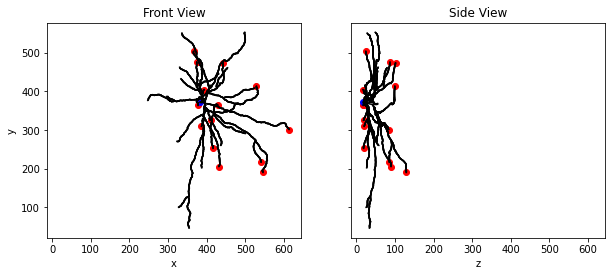

In [30]:
# Import necessary toolboxes
from allensdk.core.swc import Marker

# Set up our plot
fig, ax = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(10,10))
ax[0].set_aspect('equal')
ax[1].set_aspect('equal')

# Make a line drawing of x-y and y-z views
for n in single_cell_morphology.compartment_list:
    for c in single_cell_morphology.children_of(n):
        ax[0].plot([n['x'], c['x']], [n['y'], c['y']], color='black')
        ax[1].plot([n['z'], c['z']], [n['y'], c['y']], color='black')

# Plot cut dendrite markers in red
dm = [ m for m in markers if m['name'] == Marker.CUT_DENDRITE ]
ax[0].scatter([m['x'] for m in dm], [m['y'] for m in dm], color='red')
ax[1].scatter([m['z'] for m in dm], [m['y'] for m in dm], color='red')

# Plot no reconstruction markers in blue
nm = [ m for m in markers if m['name'] == Marker.NO_RECONSTRUCTION ]
ax[0].scatter([m['x'] for m in nm], [m['y'] for m in nm], color='blue')
ax[1].scatter([m['z'] for m in nm], [m['y'] for m in nm], color='blue')
ax[0].set_ylabel('y')
ax[0].set_xlabel('x')
ax[1].set_xlabel('z')
ax[0].set_title('Front View')
ax[1].set_title('Side View')

# Show the plot
plt.show()

## Get Electrophysiology Data

Now that we know what our cell looks like, let's take a look at its action potentials. The `get_ephys_data()` method can download electrophysiology traces for a single cell in the database. This method returns a class instance with helper methods for retrieving stimulus and response traces out of an NWB file. If we take a look at `specimen_ephys_data` we can see that it is an NWBDataSet object.  In order to use `get_ephys_data()`, you must specify the id of the cell specimen whose electrophysiology you would like to download.

Below we go over methods that can be used to access the electrophysiology data for single cells, the source documentation for all the methods we cover can be found on the <a href = 'https://allensdk.readthedocs.io/en/latest/allensdk.core.nwb_data_set.html'> Allen Brain Atlas website</a>. The `get_experiment_sweep_numbers()` method returns all of the sweep numbers for experiments in the file. Each sweep contains metadata and electrophysiology data.

In [31]:
# Get electrophysiological traces of our cell
specimen_ephys_data = ctc.get_ephys_data(specimen_id = cell_id)

# Retrieve sweep numbers for cell
sweep_numbers = specimen_ephys_data.get_experiment_sweep_numbers()

print(type(specimen_ephys_data))
print(sweep_numbers)

<class 'allensdk.core.nwb_data_set.NwbDataSet'>
[10, 100, 101, 102, 103, 104, 105, 108, 11, 12, 13, 14, 15, 17, 18, 19, 20, 21, 23, 24, 25, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 39, 4, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 5, 50, 51, 52, 53, 54, 55, 57, 58, 59, 6, 60, 61, 62, 63, 64, 65, 66, 68, 69, 7, 71, 72, 73, 74, 75, 76, 77, 78, 79, 8, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 9, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


Now that we have sweep numbers to choose from, we can take a look at a sweep's metadata by calling get_sweep_metadata(). This returns a dictionary containing information such as stimulus paramaters and recording quality.

In [32]:
# Select a sweep number 
sweep_number = sweep_numbers[-1]

# Retrieve metadata for selected sweep
specimen_metadata = specimen_ephys_data.get_sweep_metadata(sweep_number)
print(specimen_metadata)

{'aibs_stimulus_amplitude_pa': 420.0, 'aibs_stimulus_name': 'Short Square - Triple', 'gain': 0.01, 'initial_access_resistance': 15.208168, 'seal': 1.4909363}


The `get_sweep()` method returns a dictionary containing the stimulus, response, index_range, and sampling rate for a particular sweep.

In [33]:
sweep_data = specimen_ephys_data.get_sweep(sweep_number)
print(sweep_data)

{'stimulus': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), 'response': array([-0.07440625, -0.0744375 , -0.074375  , ..., -0.07428125,
       -0.074375  , -0.07428125], dtype=float32), 'stimulus_unit': 'Amps', 'index_range': (150000, 618600), 'sampling_rate': 200000.0}


Now that you've pulled down some data, chosen a cell, and chosen a sweep number, let's plot that data. We can look closer at the action potential by plotting the raw recording. Our `sweep_data` variable has all the data we need to plot our sweep; the stimulus current injected into our cell, the cell's response, and sampling rate of the sweep. 

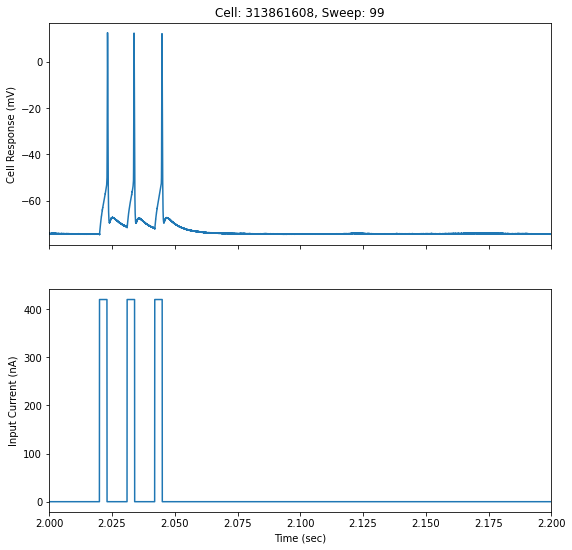

In [34]:
# Get the stimulus trace (in amps) and convert to pA
stim_current = sweep_data['stimulus'] * 1e12

# Get the voltage trace (in volts) and convert to mV
response_voltage = sweep_data['response'] * 1e3

# Get the sampling rate and can create a time axis for our data
sampling_rate = sweep_data['sampling_rate'] # in Hz
timestamps = (np.arange(0, len(response_voltage)) * (1.0 / sampling_rate))

fig, ax = plt.subplots(2, 1, sharex=True, figsize=(9,9))

ax[0].set_title('Cell: '+str(cell_id)+', Sweep: '+str(sweep_number))
ax[0].plot(timestamps, response_voltage)
ax[0].set_ylabel('Cell Response (mV)')
ax[1].plot(timestamps, stim_current)
ax[1].set_xlabel('Time (sec)')
ax[1].set_ylabel('Input Current (nA)')
ax[1].set_xlim([2,2.2])

plt.show()

That's how you can dig into the morphology and raw electrophysiology traces for single cells. In the next notebook, we'll take a look at some of the features of these action potentials.